In [16]:
import os
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import scipy.signal as signal
import matplotlib.pyplot as plt
import ipywidgets as widgets

from vocoder import Channel_Vocoder
from carrier import Carrier
from utils import compare_stft
from audioeffect import compressor, expander

sr = 44100

## 1. Select Modulator Sound

In [17]:
m_w = widgets.Dropdown(
    options=[('wow', 'wow'),
             ('suzanne', 'suzanne'),
             ('dog_sound', 'dog_sound')
            ],
    value='wow',
    description='Modulator:',
)

ipd.display(m_w)

Dropdown(description='Modulator:', options=(('wow', 'wow'), ('suzanne', 'suzanne'), ('dog_sound', 'dog_sound')…

In [18]:
modulator, _ = librosa.load("./audio_resources/{}.wav".format(m_w.value), sr=sr) 
ipd.Audio(modulator, rate=sr)

## 2. Vocode Test

In [19]:
n_fft = 512
hop_length = n_fft//4
n_channel = 60

freq_scale = 'mel'

### 2.1 Sawtooth 440 Hz

In [20]:
channel_vocoder = Channel_Vocoder(n_channel=n_channel, sr=sr, n_fft=n_fft, freq_scale=freq_scale)
output = channel_vocoder(modulator, carrier_type='sawtooth', carrier_f0=440, high_noise=False)
ipd.Audio(output, rate=sr)

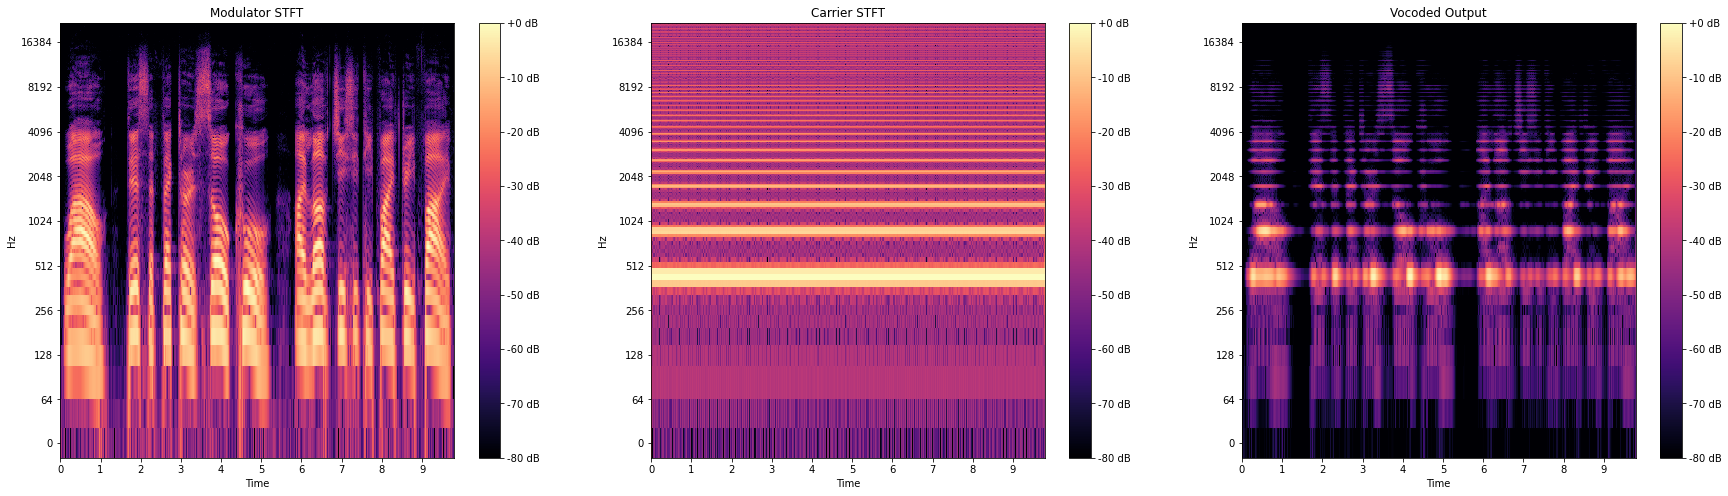

In [21]:
# Compare STFTs
carrier = Carrier('sawtooth', modulator.shape[0], sr)(440, 440)
compare_stft(modulator, carrier, output)

### 2.2 Test the various types of carrier

In [22]:
c_path = "./audio_resources/carriers"
c_list = [f.split('.wav')[0] for f in os.listdir(c_path)]

c_w = widgets.Dropdown(
    options=[(f_name, f_name) for f_name in c_list],
    value= c_list[0],
    description='Carrier:',
)

ipd.display(c_w)

Dropdown(description='Carrier:', options=(('guitar_trippyfall', 'guitar_trippyfall'), ('harp', 'harp'), ('meow…

In [23]:
# Select Carrier
carrier, _ = librosa.load("./audio_resources/carriers/{}.wav".format(c_w.value), sr=sr) 
ipd.Audio(carrier, rate=sr)

In [24]:
# Vocoded Result
channel_vocoder = Channel_Vocoder(n_channel=n_channel, sr=sr, n_fft=n_fft, freq_scale=freq_scale)
output = channel_vocoder(modulator, carrier_type=c_w.value, carrier_f0=440, high_noise=False)
ipd.Audio(output, rate=sr)

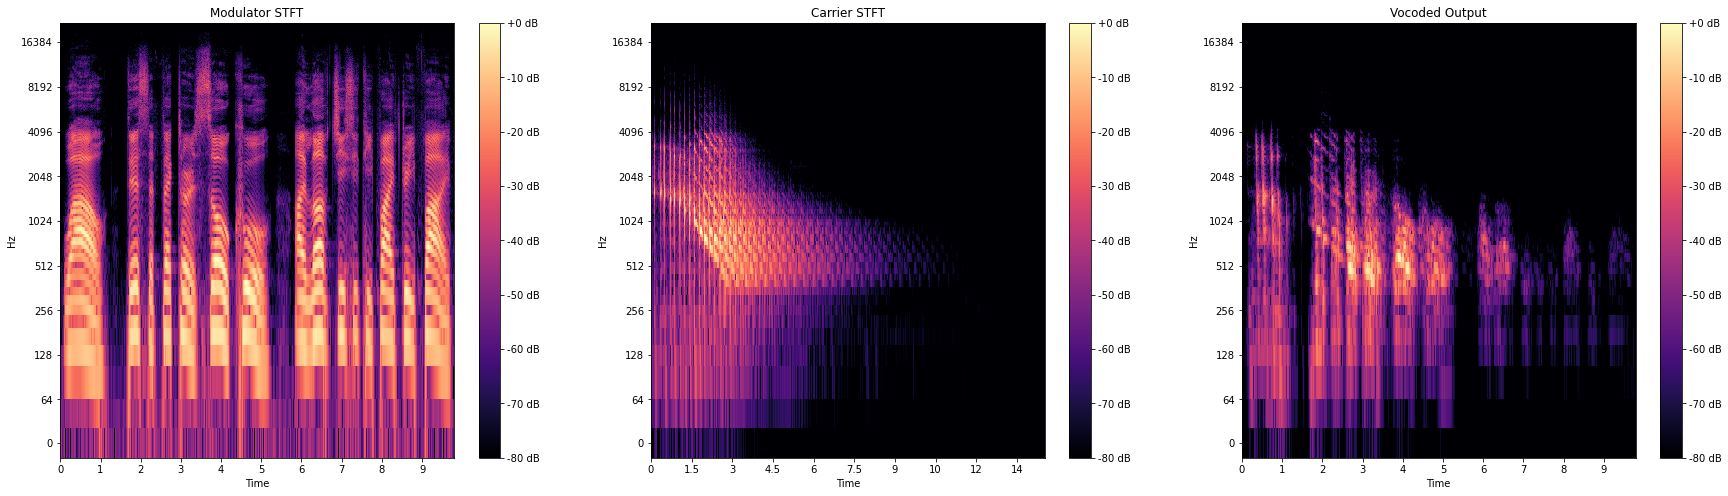

In [25]:
# Compare STFTs
compare_stft(modulator, carrier, output)

### 2.3 Compressor and Expander

In [32]:
channel_vocoder = Channel_Vocoder(n_channel=n_channel, sr=sr, n_fft=n_fft, freq_scale=freq_scale)
preprocessed_modulator = compressor(expander(modulator, threshold=-40, ratio=5), threshold=-20, ratio=2)
output = channel_vocoder(preprocessed_modulator, 
                                   carrier_type=c_w.value, 
                                   carrier_f0=440, 
                                   carrier_f_inc=880,
                                   high_noise=False,
                                   noise_amp=0.5,
                                   noise_Q=1)
ipd.Audio(output, rate=sr)

/mnt/d/gct535/prjt/vocoder_project/audioeffect.py:30: RuntimeWarning: divide by zero encountered in log10
  x_dB = 10.0 * np.log10(np.abs(x)/ref)
/mnt/d/gct535/prjt/vocoder_project/audioeffect.py:10: RuntimeWarning: divide by zero encountered in log10
  x_dB = 10.0 * np.log10(np.abs(x)/ref)


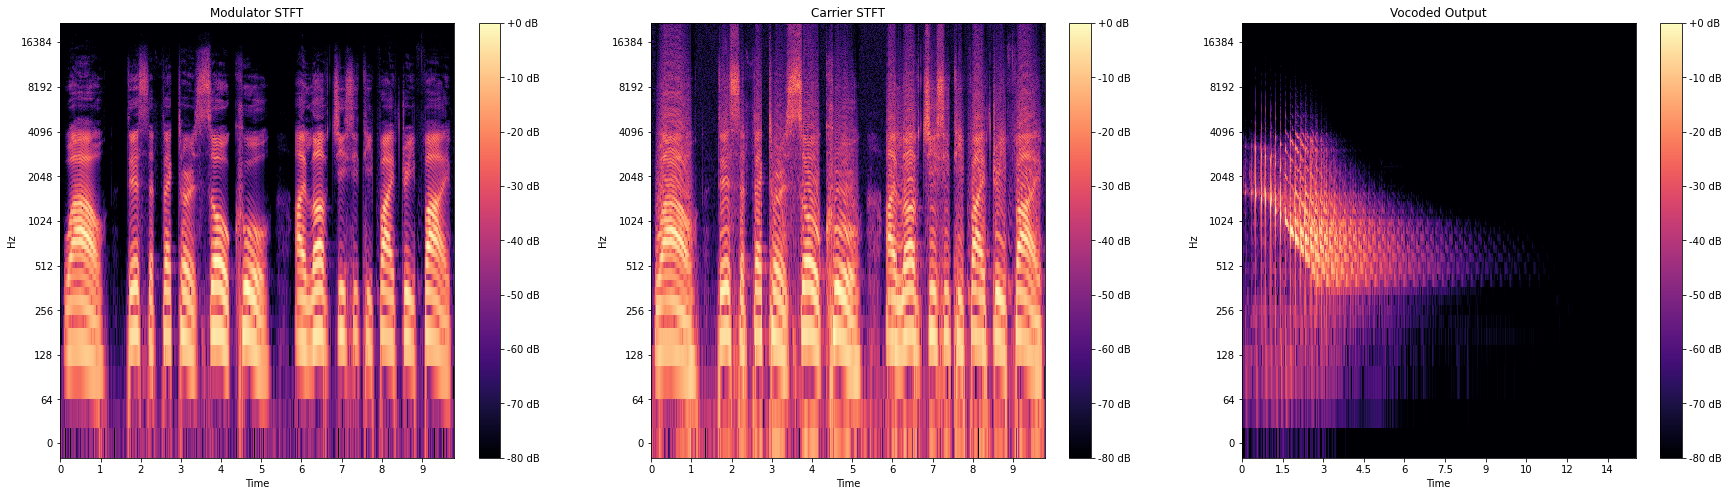

In [33]:
compare_stft(modulator, preprocessed_modulator, carrier)
#         Origianl Modulator STFT                     Preprocessed Modulator STFT                          Carrier STFT

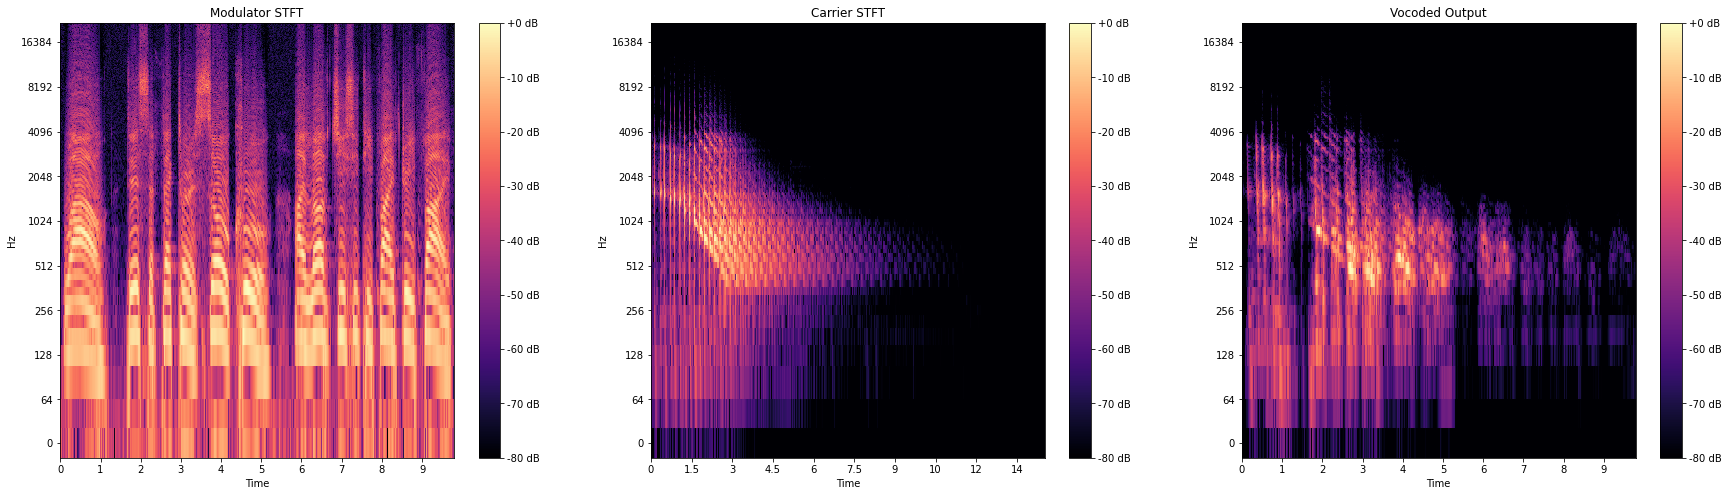

In [34]:
compare_stft(preprocessed_modulator, carrier, output)